In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#数据预处理
def pre_process_dataset(data):
  data=data.dropna()
  data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')
  data['Month'] = data['Date'].dt.strftime('%B')
  data=data.loc[:,['Date','Primary Type','Location Description', 'Count', 'Month']]
  return data

In [3]:
#读取数据
input_date = []
for year in np.arange(2017,2022,1):
    df_year = pd.read_csv("https://raw.githubusercontent.com/COMP5152TEAMWORK/Chicago-Crimes-Analysis/main/data/" + str(year) + ".csv")
    input_date.append(df_year)
input_date = pd.concat(input_date, ignore_index=True)
input_date['Count']=1
input_date

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Count
0,11614273,JC174951,01/01/2017 12:00:00 AM,018XX S CALIFORNIA AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,29.0,11,NaN,NaN,2017,03/06/2019 04:20:10 PM,NaN,NaN,NaN,1
1,11622471,JC184902,01/01/2017 12:00:00 AM,013XX S LAWNDALE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,29.0,11,NaN,NaN,2017,03/14/2019 04:07:17 PM,NaN,NaN,NaN,1
2,11255786,JB185271,01/01/2017 12:00:00 AM,045XX N HAZEL ST,1155,DECEPTIVE PRACTICE,AGGRAVATED FINANCIAL IDENTITY THEFT,COMMERCIAL / BUSINESS OFFICE,False,False,...,3.0,11,NaN,NaN,2017,03/15/2018 03:55:29 PM,NaN,NaN,NaN,1
3,11259747,JB190580,01/01/2017 12:00:00 AM,038XX W ARMITAGE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,22.0,11,NaN,NaN,2017,03/19/2018 04:13:18 PM,NaN,NaN,NaN,1
4,11267468,JB195629,01/01/2017 12:00:00 AM,017XX W HENDERSON ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,6.0,17,NaN,NaN,2017,08/23/2019 03:57:55 PM,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216023,12590391,JF110400,12/31/2021 12:00:00 AM,016XX E 69TH ST,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,...,43.0,08A,NaN,NaN,2021,01/13/2022 03:49:31 PM,NaN,NaN,NaN,1
1216024,12593035,JF113681,12/31/2021 12:00:00 AM,037XX W 62ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,65.0,26,NaN,NaN,2021,01/16/2022 03:52:07 PM,NaN,NaN,NaN,1
1216025,12597214,JF118612,12/31/2021 12:00:00 AM,065XX N WHIPPLE ST,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,...,2.0,10,NaN,NaN,2021,01/21/2022 03:48:34 PM,NaN,NaN,NaN,1
1216026,12613401,JF138848,12/31/2021 12:00:00 AM,002XX E 109TH ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,OTHER (SPECIFY),False,False,...,49.0,11,NaN,NaN,2021,02/10/2022 03:50:54 PM,NaN,NaN,NaN,1


In [4]:
data = pre_process_dataset(input_date)
data

<ipython-input-2-544fca59a69c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-2-544fca59a69c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.strftime('%B')


,Date,Primary Type,Location Description,Count,Month
5,2017-01-01,DECEPTIVE PRACTICE,RESIDENCE,1,January
6,2017-01-01,THEFT,COMMERCIAL / BUSINESS OFFICE,1,January
7,2017-01-01,CRIMINAL DAMAGE,STREET,1,January
8,2017-01-01,BATTERY,APARTMENT,1,January
9,2017-01-01,OTHER OFFENSE,STREET,1,January
...,...,...,...,...,...
1216015,2021-12-31,DECEPTIVE PRACTICE,APARTMENT,1,December
1216016,2021-12-31,DECEPTIVE PRACTICE,VEHICLE NON-COMMERCIAL,1,December
1216017,2021-12-31,BURGLARY,APARTMENT,1,December
1216018,2021-12-31,THEFT,APARTMENT,1,December


以下是在时间层面上，可以分析哪些指标

In [5]:
#按月份信息进行统计分析
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
count_of_month = data.groupby(data['Date'].dt.strftime('%B')).sum().reindex(month)
count_of_month

,Count
Date,
January,96712
February,85123
March,93540
April,90916
May,105640
June,106457
July,111927
August,111025
September,103451


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

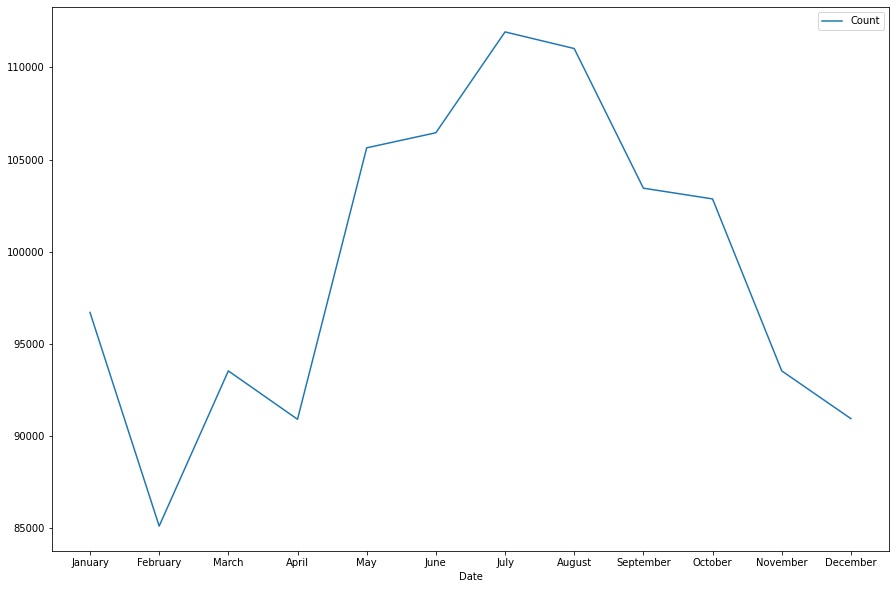

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
count_of_month.plot(ax=ax)
ticks = list(range(0,12,1))
ax.set_xticks(ticks)
ax.set_xticklabels(month)

In [7]:
#按星期几统计
data['Dayofweek'] = data.Date.dt.day_name()
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_week = data.groupby(data['Dayofweek']).sum().reindex(week)
count_week

,Count
Dayofweek,
Monday,170233
Tuesday,166839
Wednesday,168257
Thursday,166470
Friday,176987
Saturday,173927
Sunday,169438


[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

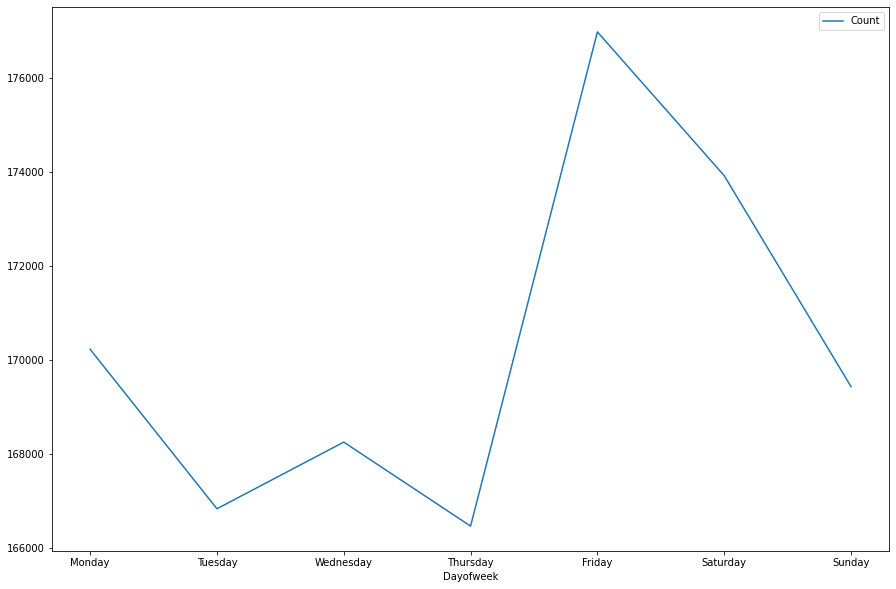

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
count_week.plot(ax=ax)
ticks = list(range(0,7,1))
ax.set_xticks(ticks)
ax.set_xticklabels(week)

In [9]:
#还可以统计犯罪类型指标去分析
type_count = data.groupby('Primary Type',as_index=False).sum()
type_count = type_count.sort_values('Count',ascending=False)
type_count.head(10)
#len(type_count)

,Primary Type,Count
32,THEFT,268266
2,BATTERY,229482
6,CRIMINAL DAMAGE,132451
1,ASSAULT,98463
9,DECEPTIVE PRACTICE,82211
24,OTHER OFFENSE,76519
18,NARCOTICS,50540
17,MOTOR VEHICLE THEFT,50465
3,BURGLARY,49464
29,ROBBERY,45146


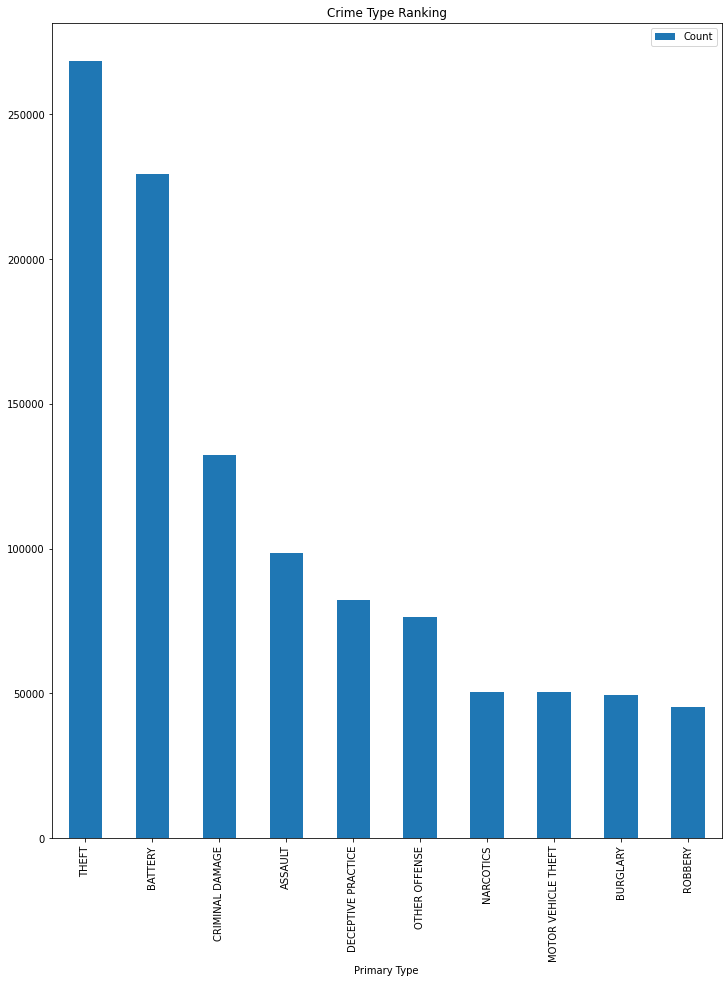

In [10]:
#对排名前10的犯罪类型画图
type_count.head(10).plot(kind='bar', figsize=(12,15), x='Primary Type', y='Count',title="Crime Type Ranking").figure.savefig('Primary_Type_Ranking.jpg')
#type_count.head(10).plot(kind='bar', figsize=(12,15), x='Primary Type', y='Count',title="Primary Type Ranking")

In [11]:
#还可以统计发生地点指标去分析
location_count = data.groupby('Location Description',as_index=False).sum()
location_count = location_count.sort_values('Count',ascending=False)
location_count.head(10)
#len(location_count)

,Location Description,Count
161,STREET,276096
135,RESIDENCE,200189
17,APARTMENT,179898
156,SIDEWALK,87204
120,OTHER,33231
157,SMALL RETAIL STORE,31500
142,RESTAURANT,28106
15,ALLEY,24682
128,PARKING LOT/GARAGE(NON.RESID.),24066
177,VEHICLE NON-COMMERCIAL,20011


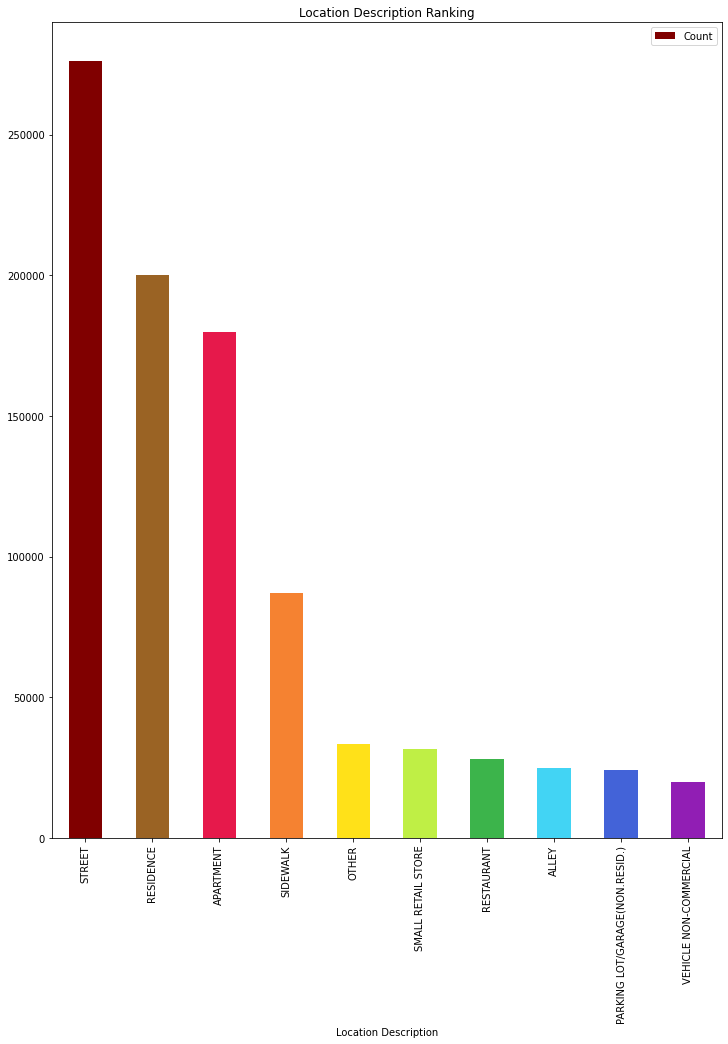

In [12]:
colors = ['#800000', '#9A6324', '#e6194B', '#f58231', '#ffe119', '#bfef45', '#3cb44b', '#42d4f4', '#4363d8', '#911eb4']
location_count.head(10)
location_count.head(10).plot(kind='bar', figsize=(12,15), x='Location Description', y='Count',title="Location Description Ranking", color=colors).figure.savefig('Location_Description_Ranking.jpg')
#location_count.head(10).plot(kind='bar', figsize=(12,15), x='Location Description', y='Count',title="Location Description Ranking", color=colors)

In [13]:
#取出排名前10的犯罪类型做数据分析画热图
df = pd.DataFrame(type_count.head(10))
type_arr = df['Primary Type'].values
#对数据集进行过滤
month_type_10 = data[data['Primary Type'].isin(type_arr)]
month_type_10 = month_type_10.groupby(['Month', 'Primary Type']).count()['Count'].reset_index().pivot('Primary Type', 'Month', 'Count')
month_type_10

Month,April,August,December,February,January,July,June,March,May,November,October,September
Primary Type,,,,,,,,,,,,
ASSAULT,7715,9106,7095,6729,7094,9526,9355,7689,9210,7405,8428,9111
BATTERY,17632,21438,16547,15767,17045,22466,21781,18521,21460,17077,19450,20298
BURGLARY,3548,4924,3849,3343,4242,4561,4198,3387,4632,4111,4440,4229
CRIMINAL DAMAGE,10662,12509,9610,8602,9621,13008,12423,10348,12401,10185,11593,11489
DECEPTIVE PRACTICE,6236,6801,7164,6703,8203,6950,6657,6937,6474,6762,7027,6297
MOTOR VEHICLE THEFT,3726,4601,4524,3437,4353,4510,4215,3664,3993,4403,4626,4413
NARCOTICS,3987,4216,3313,4892,5174,4066,3818,5125,4361,3799,3834,3955
OTHER OFFENSE,6436,6443,5347,6225,6748,6846,6727,6682,6979,5757,6239,6090
ROBBERY,3061,4356,3976,3033,4083,4101,3778,3006,3439,4113,4227,3973


<Axes: xlabel='Month', ylabel='Primary Type'>

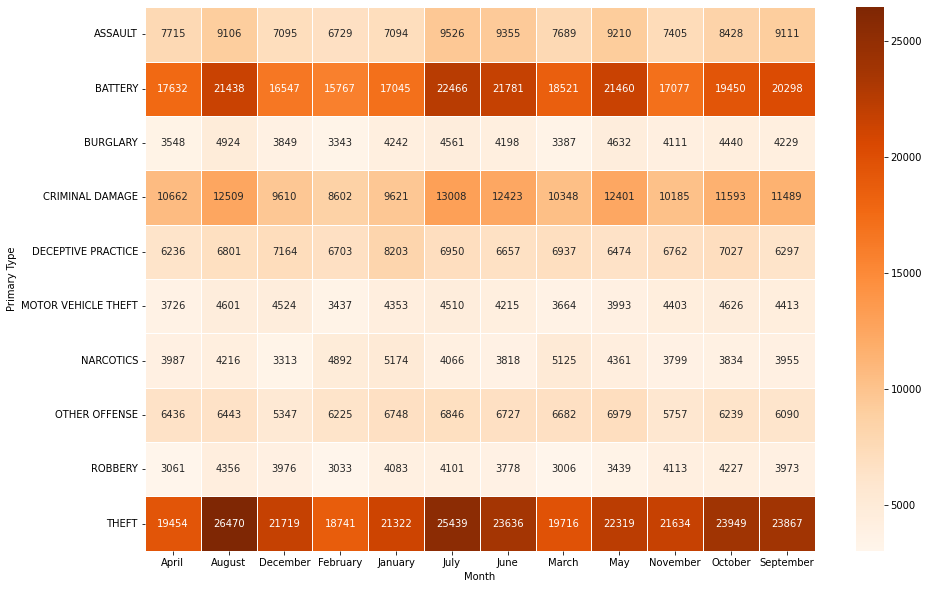

In [14]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(month_type_10, cmap='Oranges', annot=True, linewidths=0.5, fmt='.0f', ax=ax)

In [15]:
#取出排名前10的Location做数据分析画热图
df = pd.DataFrame(location_count.head(10))
location_arr = df['Location Description'].values
#对数据集进行过滤
month_location_10 = data[data['Location Description'].isin(location_arr)]
month_location_10 = month_location_10.groupby(['Month', 'Location Description']).count()['Count'].reset_index().pivot('Location Description', 'Month', 'Count')
month_location_10

Month,April,August,December,February,January,July,June,March,May,November,October,September
Location Description,,,,,,,,,,,,
ALLEY,1949,2567,1717,1373,1707,2603,2358,1834,2296,1807,2155,2316
APARTMENT,14703,15342,14869,13400,15416,15869,15432,14878,15991,14531,15001,14466
OTHER,2545,2968,2421,2845,3290,2914,2919,2631,2878,2371,2675,2774
PARKING LOT/GARAGE(NON.RESID.),1937,2058,1714,2042,2268,2214,2167,1929,2070,1715,1958,1994
RESIDENCE,15540,17500,15703,15060,17982,18275,17440,16565,17389,15913,16576,16246
RESTAURANT,1985,2448,2337,2188,2423,2532,2421,2235,2423,2383,2388,2343
SIDEWALK,6325,9664,5369,5248,5913,9433,8611,6072,8001,6215,7760,8593
SMALL RETAIL STORE,2200,3008,2672,2250,2604,2734,2555,2339,3021,2753,2694,2670
STREET,20570,26557,20814,18758,21120,26705,25166,20742,24034,21991,24684,24955


<Axes: xlabel='Month', ylabel='Location Description'>

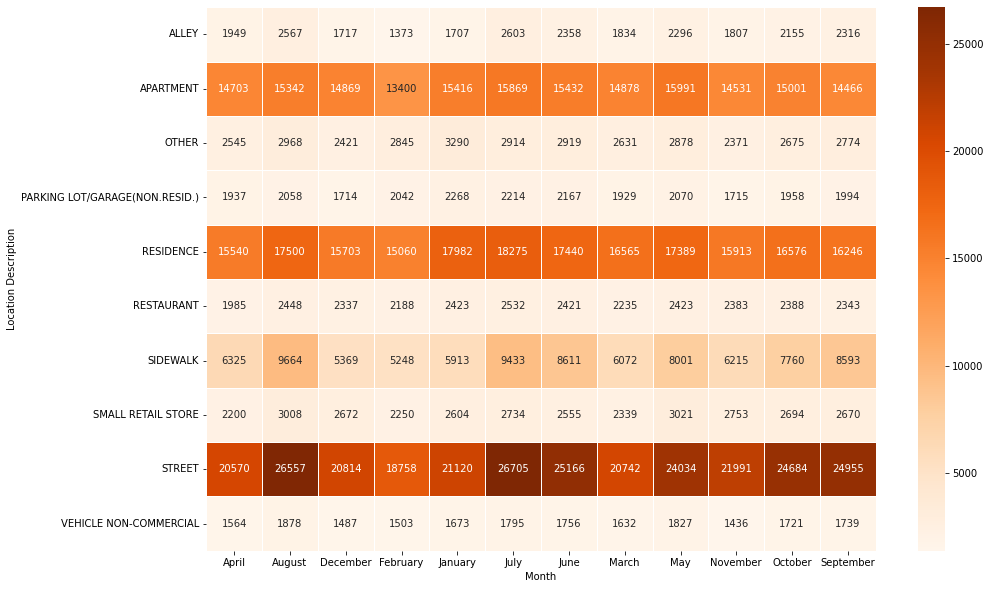

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(month_location_10, cmap='Oranges', annot=True, linewidths=0.5, fmt='.0f', ax=ax)